# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [5]:
# if os.path.isfile("penalty_data_set_0.csv"):
#     filepath = "penalty_data_set_0.csv"
#     print("loading from file")
# else:
#     filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
#     print("loading from the internet")

listings_data = pd.read_csv("listings.csv")
filepath = "listings.csv"
print("done")


done


In [6]:
listings_data.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156.0,https://www.airbnb.com/rooms/11156,2.020000e+13,14/3/2023,city scrape,An Oasis in the City,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,...,4.76,4.82,4.71,NaN,f,1,0,1,0,1.21
1,15253.0,https://www.airbnb.com/rooms/15253,2.020000e+13,13/3/2023,city scrape,Unique Designer Rooftop Apartment in City Loca...,You will be staying in a unique duplex apartme...,The location is really central and there is nu...,https://a0.muscache.com/pictures/miso/Hosting-...,59850,...,4.72,4.75,4.53,PID-STRA-24061-7,t,2,1,1,0,3.58
2,135691.0,https://www.airbnb.com/rooms/135691,2.020000e+13,13/3/2023,city scrape,Private room for your Bondi holiday,Stylish and eclectically decorated two bedroom...,The area:<br />A brisk 10 minute walk to Bondi...,https://a0.muscache.com/pictures/10544861/d342...,501973,...,4.88,4.79,4.59,PID-STRA-15719,f,1,0,1,0,0.26
3,44545.0,https://www.airbnb.com/rooms/44545,2.020000e+13,14/3/2023,previous scrape,Sunny Darlinghurst Warehouse Apartment,Sunny warehouse/loft apartment in the heart of...,Darlinghurst is home to some of Sydney's best ...,https://a0.muscache.com/pictures/a88d8e14-4f63...,112237,...,4.96,4.93,4.77,NaN,f,1,1,0,0,0.50
4,58506.0,https://www.airbnb.com/rooms/58506,2.020000e+13,14/3/2023,city scrape,"Studio Yindi @ Mosman, Sydney","An open plan apartment, adjacent to a spacious...","Mosman is a smart, middle to upper class subur...",https://a0.muscache.com/pictures/23497720/d30f...,279955,...,4.91,4.74,4.70,PID-STRA-2810,f,1,1,0,0,2.47


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [7]:
listings_data.sample(5)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2838,9.699322e+06,https://www.airbnb.com/rooms/9699322,2.020000e+13,14/3/2023,previous scrape,Beach Front Apt in Beautiful Bronte,Our stylish light filled apartment is situated...,A real Sydney experience is offered at Bronte ...,https://a0.muscache.com/pictures/02ad1d5f-8162...,50087628,...,4.67,5.00,4.67,NaN,f,1,1,0,0,0.03
16583,4.969469e+07,https://www.airbnb.com/rooms/49694688,2.020000e+13,13/3/2023,city scrape,"The Bothy, your island retreat","Your own island retreat awaits you, set amidst...","Church Point, where the ferry leaves from, is ...",https://a0.muscache.com/pictures/miso/Hosting-...,219187209,...,5.00,4.78,5.00,PID-STRA-6487,f,1,1,0,0,0.54
22377,8.340000e+17,https://www.airbnb.com/rooms/833788846983631848,2.020000e+13,13/3/2023,city scrape,Cosmopolitan Heights,Sophisticated city-living with sky pool in the...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,7409213,...,NaN,NaN,NaN,PID-STRA-48986,t,175,175,0,0,NaN
8290,2.327810e+07,https://www.airbnb.com/rooms/23278104,2.020000e+13,13/3/2023,city scrape,Premium Beachside Living at a Chic Coogee Esca...,Soak up the natural light in the double-height...,The Eora apartments boast a coveted location j...,https://a0.muscache.com/pictures/b398fb56-0781...,2450066,...,4.83,4.83,4.50,PID-STRA-18058,f,96,96,0,0,0.17
9801,2.902154e+07,https://www.airbnb.com/rooms/29021535,2.020000e+13,14/3/2023,previous scrape,Exclusive use of a compact first floor garden ...,Exclusive use of a compact first floor garden ...,There are a number of parks and public spaces ...,https://a0.muscache.com/pictures/36796869-ddd1...,218727051,...,4.98,4.80,4.90,PID-STRA-4705,f,1,1,0,0,0.95


We can also get the list of columns out of the data frame

In [8]:
listings_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', ' price ',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [9]:
row_one = listings_data.iloc[1]
row_one


id                                                                         15253.0
listing_url                                     https://www.airbnb.com/rooms/15253
scrape_id                                                         20200000000000.0
last_scraped                                                             13/3/2023
source                                                                 city scrape
                                                               ...                
calculated_host_listings_count                                                   2
calculated_host_listings_count_entire_homes                                      1
calculated_host_listings_count_private_rooms                                     1
calculated_host_listings_count_shared_rooms                                      0
reviews_per_month                                                             3.58
Name: 1, Length: 75, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [10]:
row_one["name"]

'Unique Designer Rooftop Apartment in City Location'

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [11]:
row_one.host_name

'Morag'

Doing the same thing on a dataframe gives us the whole column

In [12]:
listings_data.neighbourhood_cleansed

0            Sydney
1            Sydney
2          Waverley
3            Sydney
4            Mosman
            ...    
22654    Canada Bay
22655        Sydney
22656      Waverley
22657          Ryde
22658    Canada Bay
Name: neighbourhood_cleansed, Length: 22659, dtype: object

<AxesSubplot:>

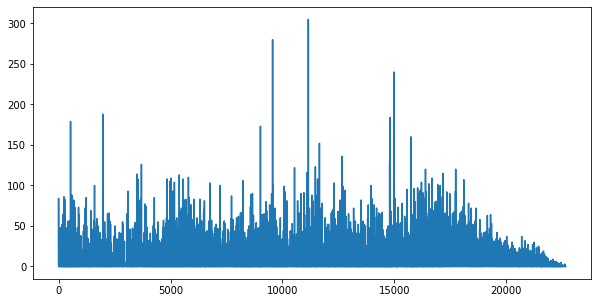

In [13]:
listings_data["number_of_reviews_ltm"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<AxesSubplot:>

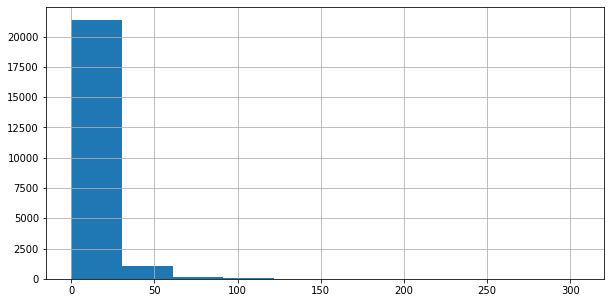

In [14]:
listings_data.number_of_reviews_ltm.hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

<AxesSubplot:>

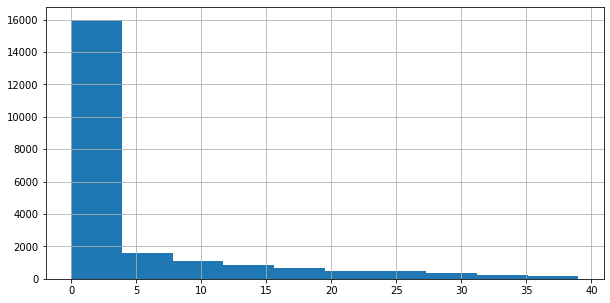

In [15]:
listings_data.number_of_reviews_ltm[listings_data.number_of_reviews_ltm < 40].hist()


That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [16]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [17]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [18]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.


0      0
1      1
2      2
3      3
97    97
98    98
99    99
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [19]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [20]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about


['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [21]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goldfish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat and Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

In [22]:
[p.upper() for p in pets]

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT AND LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [23]:
[p for p in pets if len(p) == 4]


['Goat', 'Zebu', 'duck', 'mink']

And this one is doing both

In [24]:
[p.upper() for p in pets if len(p) == 5]


['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'Number of reviews under 70')

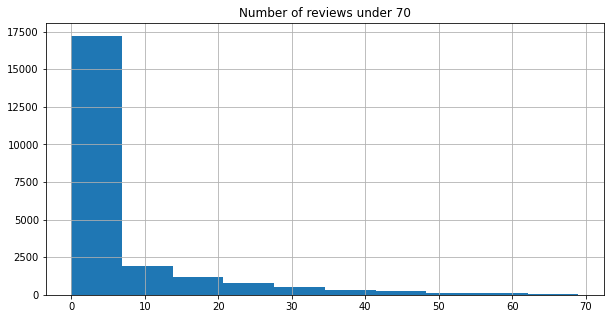

In [25]:
upper_bound = 70
listings_data.number_of_reviews_ltm[listings_data.number_of_reviews_ltm < upper_bound].hist()
plt.title(f"Number of reviews under {upper_bound}")


Let's see what's under $1000

Text(0.5, 1.0, 'Number of reviews under 70')

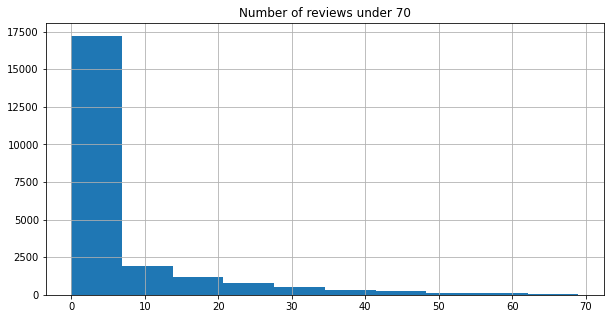

In [26]:
upper_bound = 70
listings_data.number_of_reviews_ltm[listings_data.number_of_reviews_ltm < upper_bound].hist()
plt.title(f"Number of reviews under {upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [27]:
listings_data.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156.0,https://www.airbnb.com/rooms/11156,2.020000e+13,14/3/2023,city scrape,An Oasis in the City,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,...,4.76,4.82,4.71,NaN,f,1,0,1,0,1.21
1,15253.0,https://www.airbnb.com/rooms/15253,2.020000e+13,13/3/2023,city scrape,Unique Designer Rooftop Apartment in City Loca...,You will be staying in a unique duplex apartme...,The location is really central and there is nu...,https://a0.muscache.com/pictures/miso/Hosting-...,59850,...,4.72,4.75,4.53,PID-STRA-24061-7,t,2,1,1,0,3.58


We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [28]:
listings_data.review_scores_communication.value_counts()

5.00    8050
4.00     421
4.50     365
4.96     333
4.95     332
        ... 
3.70       1
4.02       1
3.38       1
3.79       1
2.40       1
Name: review_scores_communication, Length: 145, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<AxesSubplot:>

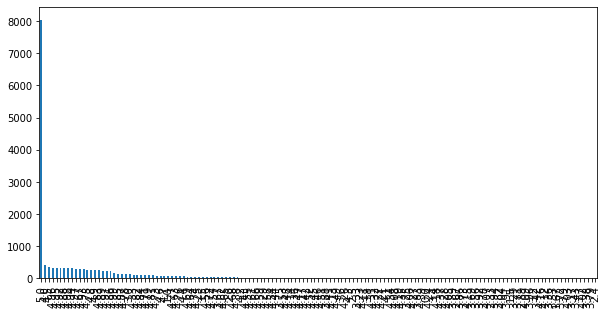

In [29]:
pdvc = listings_data.review_scores_communication.value_counts() # This makes a series
pdvc.plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

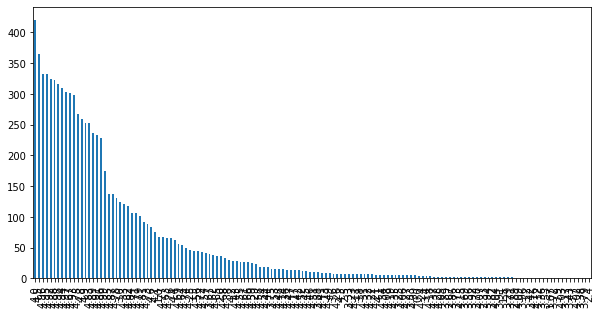

In [30]:
pdvc = listings_data.review_scores_communication.value_counts() 
pdvc[pdvc < 500].plot(kind="bar");

This pattern keeps repeating itself:

<AxesSubplot:>

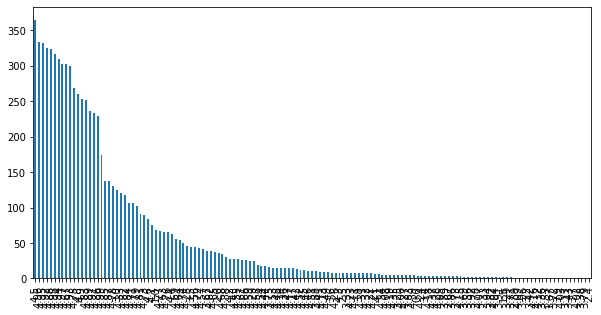

In [31]:
pdvc[pdvc < 400].plot(kind="bar")

<AxesSubplot:>

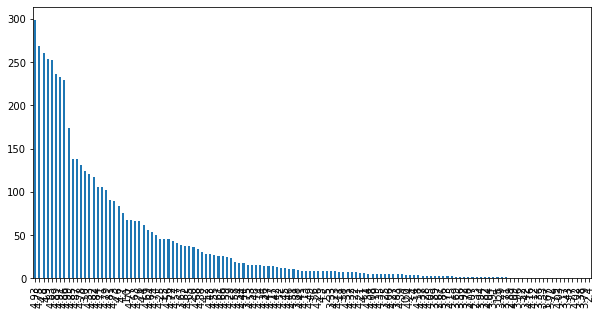

In [32]:
pdvc[pdvc < 300].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

<AxesSubplot:>

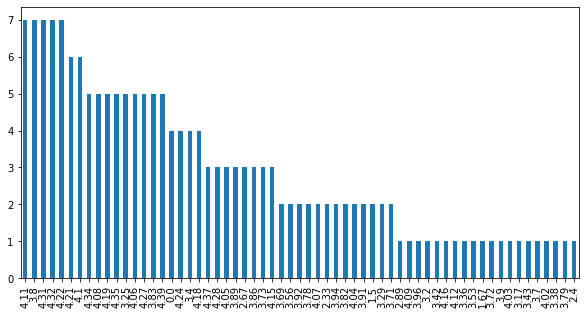

In [33]:
pdvc[pdvc < 8].plot(kind="bar")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [34]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


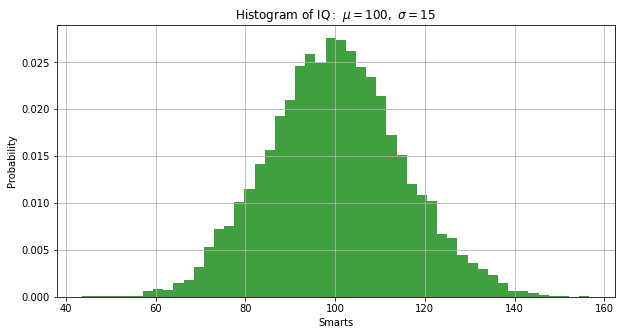

In [35]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

<AxesSubplot:>

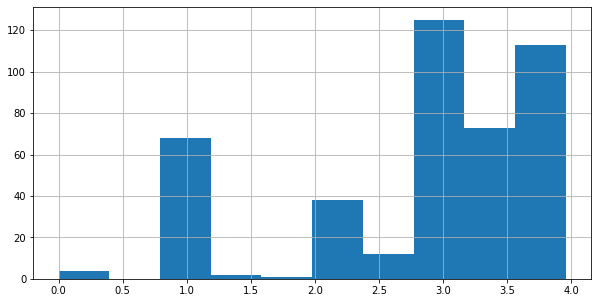

In [36]:
listings_data.review_scores_communication[listings_data.review_scores_communication < 4].hist()


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

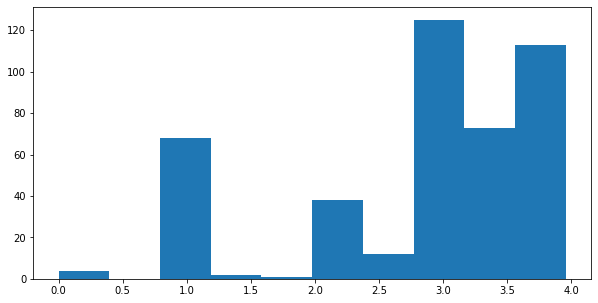

In [37]:
review_scores_communication_data = listings_data.review_scores_communication[listings_data.review_scores_communication < 4]
plt.hist(review_scores_communication_data)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

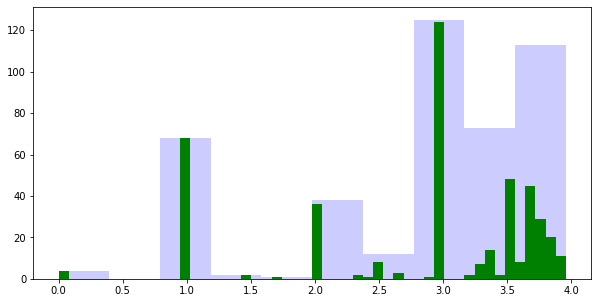

In [38]:
review_scores_communication_data = listings_data.review_scores_communication[listings_data.review_scores_communication < 4]

# We can keep adding things to this plot to see what's going on.
plt.hist(review_scores_communication_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(review_scores_communication_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


We can go back to our initial, unfiltered, data:

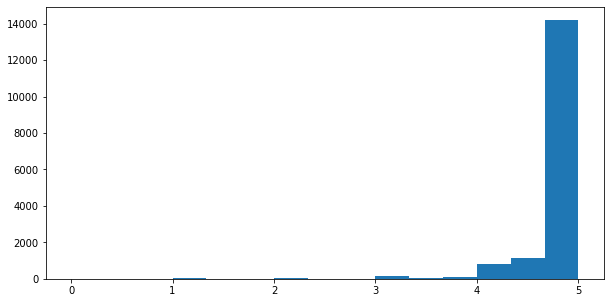

In [39]:
plt.hist(listings_data.review_scores_communication, bins=15)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [43]:
listings_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["host_since"],
    dayfirst=True,
)
listings_data.head(2)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156.0,https://www.airbnb.com/rooms/11156,2.020000e+13,14/3/2023,city scrape,An Oasis in the City,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,...,4.76,4.82,4.71,NaN,f,1,0,1,0,1.21
1,15253.0,https://www.airbnb.com/rooms/15253,2.020000e+13,13/3/2023,city scrape,Unique Designer Rooftop Apartment in City Loca...,You will be staying in a unique duplex apartme...,The location is really central and there is nu...,https://a0.muscache.com/pictures/miso/Hosting-...,59850,...,4.72,4.75,4.53,PID-STRA-24061-7,t,2,1,1,0,3.58


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [73]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(listings_data.host_since.min(), date_format_pattern)
latest_date = datetime.strftime(listings_data.host_since.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


'range is: June, 2009 to March, 2023'

Which means that we can put those values into our graph title:

In [74]:
# number_of_bins = 100
# lower_bound = 0
# upper_bound = 1000

# plt.hist(
#     penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound)
# )
# plt.title(
#     f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
#     fontsize=12,
# )
# plt.xlabel("$ value of fine", fontsize=10)
# plt.ylabel("Count", fontsize=10)
# plt.grid(True)
# plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

In [75]:
# income = penalty_data[["OFFENCE_MONTH", "FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

# plt.xkcd()
# plt.plot(income, "x-")
# plt.title("Monthly income from fines", fontsize=18)
# plt.xlabel("Date", fontsize=26)
# plt.ylabel("$ Value", fontsize=26)
# plt.grid(True)
# plt.show()


In [76]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [77]:
# ss = penalty_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [78]:
# ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
# ss.head(2)


Above is equivalent to below, it's up to you to decide what is more readable.

In [79]:
# def my_f(x):
#     return x.OFFENCE_MONTH.day


# ss["day_from_function"] = ss.apply(my_f, axis=1)
# ss.head(1)


Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
# def my_f(x):
#     return datetime.strftime(x.OFFENCE_MONTH, "%A")


# ss["nice_day"] = ss.apply(my_f, axis=1)
# ss.head(1)


/var/folders/h7/2f3zxpvd1q5ddv0m_sjf33vm0000gn/T/ipykernel_49483/2432571321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day_from_lambda,day_from_function,nice_day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,46,16238,1,1,Friday


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

In [80]:
# def my_f(x):
#     return datetime.strftime(x.OFFENCE_MONTH, "%A")


# penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
# penalty_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [81]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))


uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_

In [45]:
listings_data.shape

(22659, 75)

In [46]:
listings_data.name

# I would like to be shown how to make count a specific word that shows up in these descriptions. 
# What sort of code can you write for wordy desciptions

0                                     An Oasis in the City
1        Unique Designer Rooftop Apartment in City Loca...
2                      Private room for your Bondi holiday
3                   Sunny Darlinghurst Warehouse Apartment
4                            Studio Yindi @ Mosman, Sydney
                               ...                        
22654                                               超大豪华套房
22655                                 Six on Orwell Street
22656                                          Sunny Bondi
22657                           1 bed apartment with study
22658                                               温馨舒适房间
Name: name, Length: 22659, dtype: object

In [47]:
hnc = listings_data["host_name"].value_counts()
print(hnc)
# how do I show more of this data? How do I make it show me past Michael???

MadeComfy                           232
David                               221
L'Abode Accommodation Specialist    175
Ken                                 161
Michael                             153
                                   ... 
Brayan                                1
Anne-Lise                             1
Hui                                   1
Miria                                 1
Edin                                  1
Name: host_name, Length: 5397, dtype: int64


<AxesSubplot:>

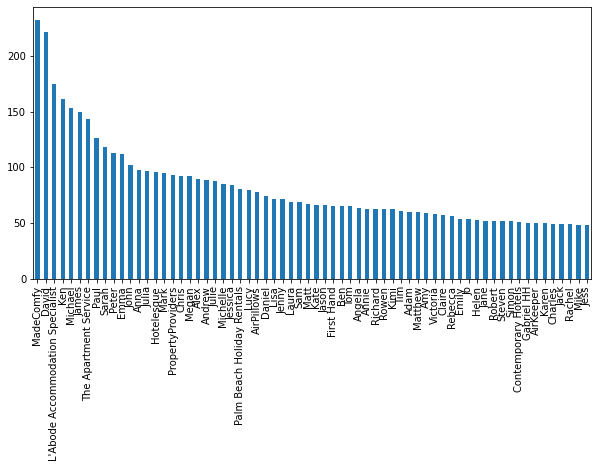

In [48]:
hnc[hnc > 47].plot(kind="bar")

In [103]:
madecomfy = listings_data.iloc[3359]
madecomfy

id                                                                         10556199.0
listing_url                                     https://www.airbnb.com/rooms/10556199
scrape_id                                                            20200000000000.0
last_scraped                                                                14/3/2023
source                                                                previous scrape
                                                                ...                  
calculated_host_listings_count                                                      1
calculated_host_listings_count_entire_homes                                         0
calculated_host_listings_count_private_rooms                                        1
calculated_host_listings_count_shared_rooms                                         0
reviews_per_month                                                                0.01
Name: 3359, Length: 75, dtype: object

2009-06-16 00:00:00 2023-03-08 00:00:00


<AxesSubplot:>

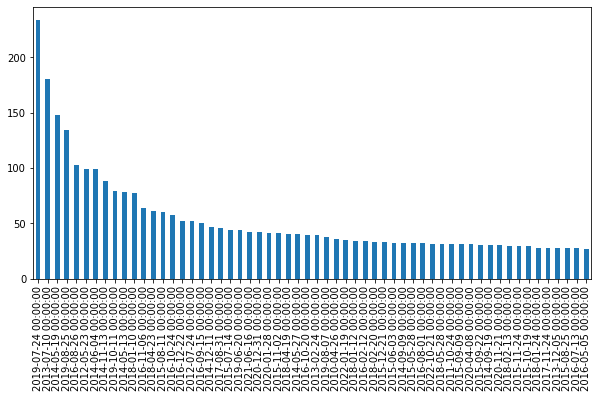

In [50]:
first_date = listings_data.host_since.min()
last_date = listings_data.host_since.max()
print(first_date,last_date)

hsc = listings_data["host_since"].value_counts()

hsc[hsc > 26].plot(kind = "bar")

In [51]:
listings_data["host_location"].value_counts()

Sydney, Australia                        5554
New South Wales, Australia               1974
Bondi Beach, Australia                    548
Australia                                 445
Manly, Australia                          377
                                         ... 
Prahran, Australia                          1
Saint-Maximin-la-Sainte-Baume, France       1
Tongyeong-si, South Korea                   1
Susegana, Italy                             1
Tanunda, Australia                          1
Name: host_location, Length: 1057, dtype: int64

In [52]:
# listings_data['host_location'] = listings_data['host_location'].str.replace('Australia', '', regex=True)

<AxesSubplot:>

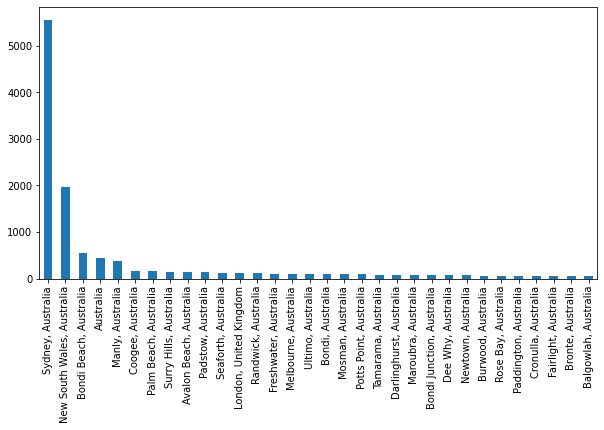

In [53]:
hlc = listings_data["host_location"].value_counts()
hlc[hlc > 50].plot(kind = "bar")

In [54]:
df_new = listings_data.loc[(listings_data["host_location"].str.count("Australia") < 1)]

In [55]:
listings_data.host_location.iloc[16]

'Los Angeles, CA'

In [56]:
count = df_new["host_location"].value_counts()
count

London, United Kingdom     114
England, United Kingdom     25
New York, NY                25
Auckland, New Zealand       23
Paris, France               22
                          ... 
Bedwas, United Kingdom       1
Přibice, Czechia             1
Salt Lake City, UT           1
Limeira, Brazil              1
Makawao, HI                  1
Name: host_location, Length: 363, dtype: int64

<AxesSubplot:>

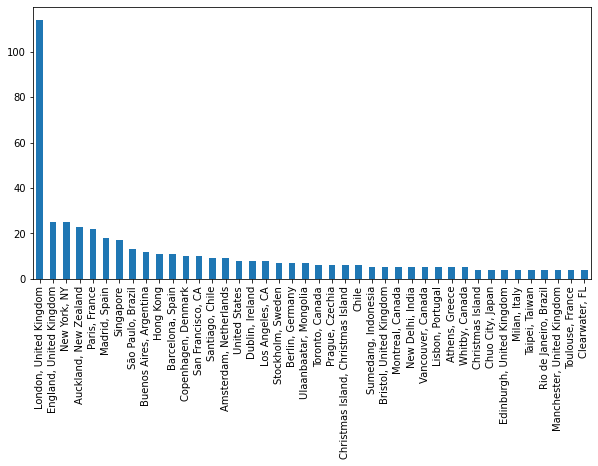

In [57]:
count[count > 3].plot(kind = "bar")

In [58]:
# how do I add value counts together? I have value counts for international locations, and the overall number of listings.
# I want to show percentage of international locations. 

count.value_counts() # I could manually figure it out: 900. There are 900 international hosts. Approx 4%.

1      240
2       57
3       24
4        9
5        8
6        4
7        3
8        3
9        2
10       2
25       2
11       2
12       1
13       1
17       1
18       1
22       1
23       1
114      1
Name: host_location, dtype: int64

In [59]:
(900//22658)

0

In [60]:
listings_data["host_response_rate"].value_counts()

100%    8139
0%       458
90%      409
98%      380
99%      303
91%      180
97%      176
96%      119
80%      118
58%       93
93%       88
95%       82
50%       81
92%       78
67%       52
86%       49
75%       47
94%       37
83%       33
88%       29
20%       28
33%       26
82%       22
84%       21
70%       21
85%       19
60%       18
89%       13
40%       10
87%       10
13%       10
25%        9
63%        7
81%        6
78%        6
74%        5
71%        4
56%        3
43%        3
32%        2
73%        2
72%        1
55%        1
44%        1
57%        1
29%        1
Name: host_response_rate, dtype: int64

In [61]:
listings_data["host_acceptance_rate"].value_counts()

100%    3818
99%     1131
98%      855
0%       417
97%      396
        ... 
26%        2
13%        1
28%        1
11%        1
41%        1
Name: host_acceptance_rate, Length: 84, dtype: int64

In [62]:
listings_data["host_is_superhost"].value_counts()

f    19520
t     3121
Name: host_is_superhost, dtype: int64

<AxesSubplot:>

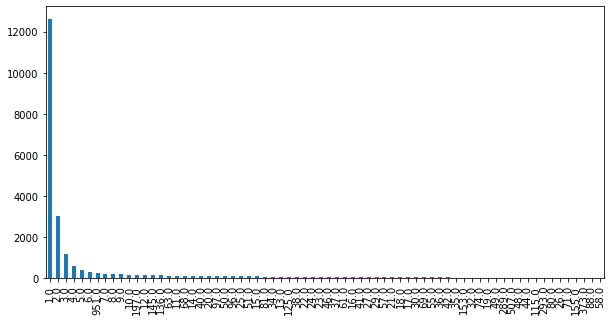

In [63]:
hlcc = listings_data["host_listings_count"].value_counts()
hlcc.plot(kind = "bar")

# how do I figure out who it is who has 951 listings? is it using iloc?
# I kind of cheated and found it in excel :) it is MadeComfy who has 951. 

In [64]:
listings_data["host_identity_verified"].value_counts()

t    18782
f     3875
Name: host_identity_verified, dtype: int64

In [65]:
listings_data["neighbourhood_cleansed"].value_counts()

# Sydney as in CBD and inner city suburbs. Waverly is like Bondi and stuff

Sydney              5019
Waverley            2898
Randwick            1820
Warringah           1220
Manly               1108
Pittwater           1077
Woollahra            871
North Sydney         823
Marrickville         679
Leichhardt           548
Sutherland Shire     467
Rockdale             449
Ryde                 448
Botany Bay           376
Willoughby           371
Parramatta           369
Auburn               356
Hornsby              348
Mosman               315
Canada Bay           305
The Hills Shire      273
Canterbury           247
Blacktown            241
Ku-Ring-Gai          238
Burwood              229
Lane Cove            189
Ashfield             186
Bankstown            166
Penrith              151
Hurstville           137
Strathfield          136
City Of Kogarah      132
Liverpool            131
Fairfield            106
Campbelltown          75
Holroyd               67
Camden                57
Hunters Hill          31
Name: neighbourhood_cleansed, dtype: int64

<AxesSubplot:>

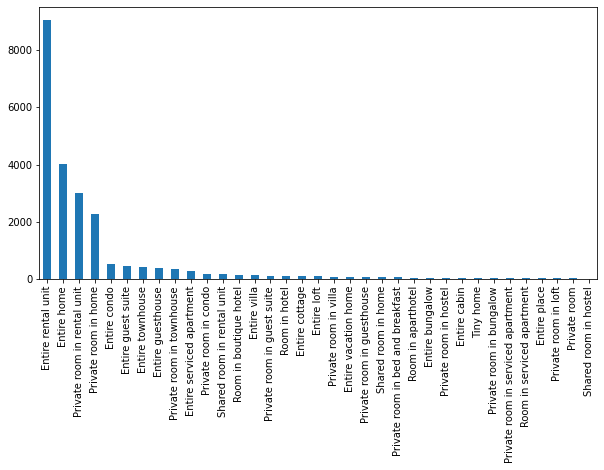

In [66]:
ptc = listings_data["property_type"].value_counts()
ptc[ptc > 12].plot(kind = "bar")

In [67]:
listings_data["accommodates"].value_counts()

2     9061
4     4722
6     2044
1     1956
3     1433
5     1154
8     1046
7      424
10     400
9      157
12     114
11      58
16      39
14      31
13      12
15       8
Name: accommodates, dtype: int64

In [68]:
listings_data["bedrooms"].value_counts()

1.0     11428
2.0      5433
3.0      2407
4.0      1394
5.0       527
6.0        93
7.0        11
10.0        4
9.0         2
11.0        1
8.0         1
13.0        1
Name: bedrooms, dtype: int64

In [69]:
"amenities"
# feel like there could be something I could do with this one, but not sure what

'amenities'

<AxesSubplot:>

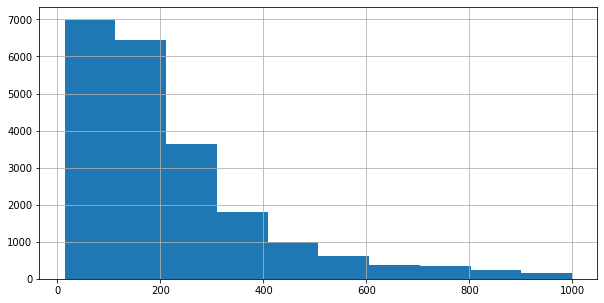

In [98]:
# listings_data. price [listings_data.price  > 700].hist()

# daily price in aud

listings_data[' price '][listings_data[' price '] < 1000].hist()

<AxesSubplot:>

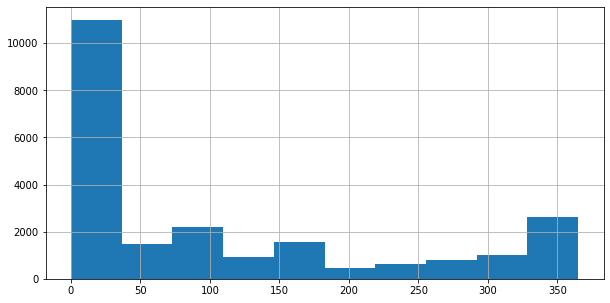

In [99]:
listings_data.availability_365.hist()

In [100]:
listings_data["has_availability"].value_counts()

t    22518
f      141
Name: has_availability, dtype: int64

In [101]:
listings_data["availability_365"].value_counts()

0      9712
365     625
89      346
364     309
91      299
       ... 
215       8
188       7
198       7
222       7
202       6
Name: availability_365, Length: 366, dtype: int64

<AxesSubplot:>

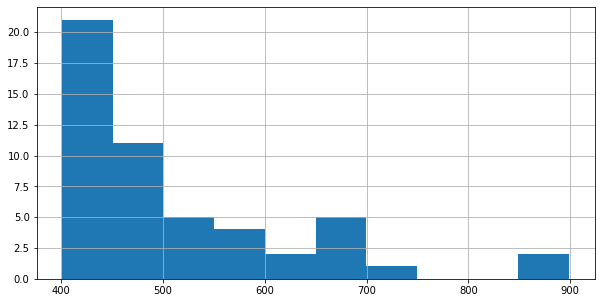

In [102]:
listings_data.number_of_reviews[listings_data.number_of_reviews > 400].hist()

<AxesSubplot:>

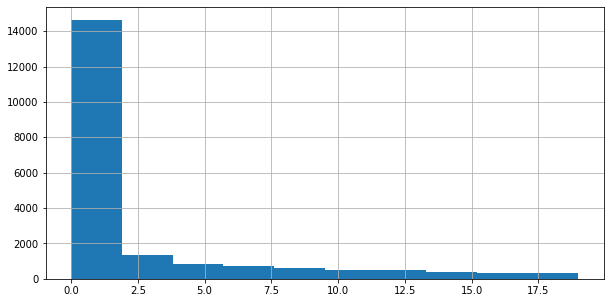

In [ ]:
listings_data.number_of_reviews_ltm.hist()
# past 12 months
# I dont understand this hist. How can u have 2.5 reviews?

<AxesSubplot:>

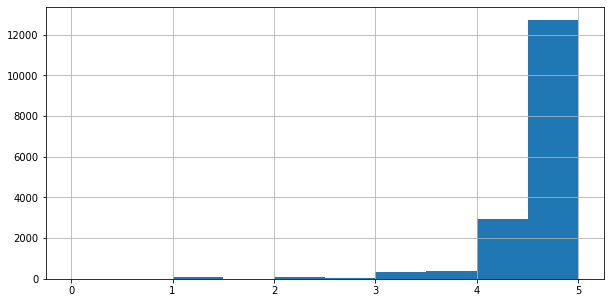

In [ ]:
listings_data.review_scores_value.hist()

<AxesSubplot:>

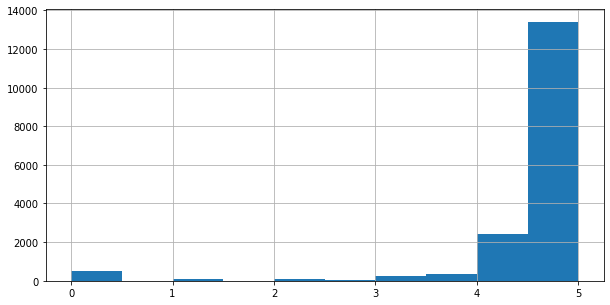

In [ ]:
listings_data.review_scores_rating.hist()

<AxesSubplot:>

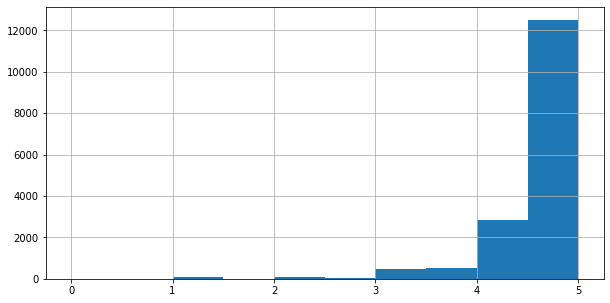

In [ ]:
listings_data.review_scores_cleanliness.hist()

<AxesSubplot:>

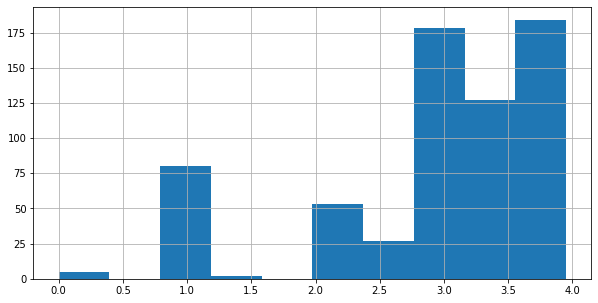

In [ ]:
listings_data.review_scores_accuracy[listings_data.review_scores_accuracy < 4].hist()

In [106]:
listings_data.maximum_nights.value_counts()

1125    13967
365      3973
90        958
30        433
180       330
        ...  
444         1
105         1
140         1
192         1
88          1
Name: maximum_nights, Length: 177, dtype: int64

In [ ]:
listings_data["neighbourhood_cleansed"].value_counts()

# Sydney as in CBD and inner city suburbs. Waverly is like Bondi and stuff

Majority of airbnbs are in City of Sydney, Waverly covering Bondi, and beachside suburbs